In [1]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Only Training data is used

df_FaultFree = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_Faulty_Training.RData')['faulty_training']

In [3]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

# Scale the dataset

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fault_free = DF[DF['faultNumber']==0].iloc[:,3:]

fault_free_scaled = sc.fit_transform(fault_free)


In [60]:
fault_free_scaled.shape

(250000, 52)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(fault_free_scaled, fault_free_scaled, test_size=0.2, random_state=42)

In [87]:
X_train.shape

(200000, 52)

In [102]:
X_test.shape

(50000, 52)

# Construct Neural Net

In [104]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define input layer
input_layer = Input(shape=(X_train.shape[1],))

# Define encoder layers
encoded = Dense(32, activation='relu')(input_layer)

# Define decoder layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='linear')(decoded)

# Define autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Print model summary
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 52)]              0         
                                                                 
 dense_27 (Dense)            (None, 32)                1696      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 52)                1716      
                                                                 
Total params: 4,468
Trainable params: 4,468
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
32/32 [==============================] - 1s 16ms/step - loss: 1.1219 - val_loss: 0.9816
Epoch 2/300
32/32 [==============================] - 0s 8ms/step - loss: 0.9505 - val_loss: 0.8806
Epoch 3/300
32/32 [==============================] - 0s 8ms/step - loss: 0.8504 - val_loss: 0.7911
Epoch 4/300
32/32 [==============================] - 0s 8ms/step - loss: 0.7575 - val_loss: 0.7086
Epoch 5/300
32/32 [==============================] - 0s 8ms/step - loss: 0.6704 - val_loss: 0.6323
Epoch 6/300
32/32 [==============================] - 0s 7ms/step - loss: 0.5986 - val_loss: 0.5733
Epoch 7/300
32/32 [==============================] - 0s 9ms/step - loss: 0.5451 - val_loss: 0.5265
Epoch 8/300
32/32 [==============================] - 0s 8ms/step - loss: 0.5037 - val_loss: 0.4905
Epoch 9/300
32/32 [==============================] - 0s 9ms/step - loss: 0.4705 - val_loss: 0.4623
Epoch 10/300
32/32 [==============================] - 0s 9ms/step - loss: 0.4440 - val_loss: 0.4388
Epoch 11

Epoch 83/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0969 - val_loss: 0.1022
Epoch 84/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0962 - val_loss: 0.1008
Epoch 85/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0956 - val_loss: 0.1007
Epoch 86/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0953 - val_loss: 0.1009
Epoch 87/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0953 - val_loss: 0.1000
Epoch 88/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0950 - val_loss: 0.1001
Epoch 89/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0945 - val_loss: 0.0990
Epoch 90/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0939 - val_loss: 0.0992
Epoch 91/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0939 - val_loss: 0.0993
Epoch 92/300
32/32 [==============================] - 0s 10ms/step - loss: 0.0936 - val_loss: 0.0981

32/32 [==============================] - 0s 9ms/step - loss: 0.0871 - val_loss: 0.0915
Epoch 165/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0875 - val_loss: 0.0915
Epoch 166/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0872 - val_loss: 0.0907
Epoch 167/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0871 - val_loss: 0.0911
Epoch 168/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0875 - val_loss: 0.0912
Epoch 169/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0871 - val_loss: 0.0910
Epoch 170/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0871 - val_loss: 0.0906
Epoch 171/300
32/32 [==============================] - 0s 7ms/step - loss: 0.0869 - val_loss: 0.0912
Epoch 172/300
32/32 [==============================] - 0s 9ms/step - loss: 0.0872 - val_loss: 0.0908
Epoch 173/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0873 - val_loss: 0.0915
Epoc

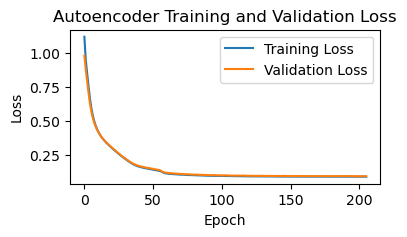

In [105]:
# Define early stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# Fit autoencoder model with early stopping callback
history = autoencoder.fit(X_train[::50], X_train[::50],
                epochs=300,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test[::50], X_test[::50]),
                callbacks=[early_stopping_callback])

plt.rcParams['figure.figsize'] = [4, 2]
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the Reconstructed Data 

In [106]:
temp = DF[(DF['faultNumber']==0) & (DF['simulationRun'] == np.random.randint(1,500) )] #Normal state
# Scale the data to standardize
temp_sc = sc.transform(temp.iloc[:,3:])

temp_pred = autoencoder.predict(temp_sc)

16/16 [==============================] - 0s 3ms/step


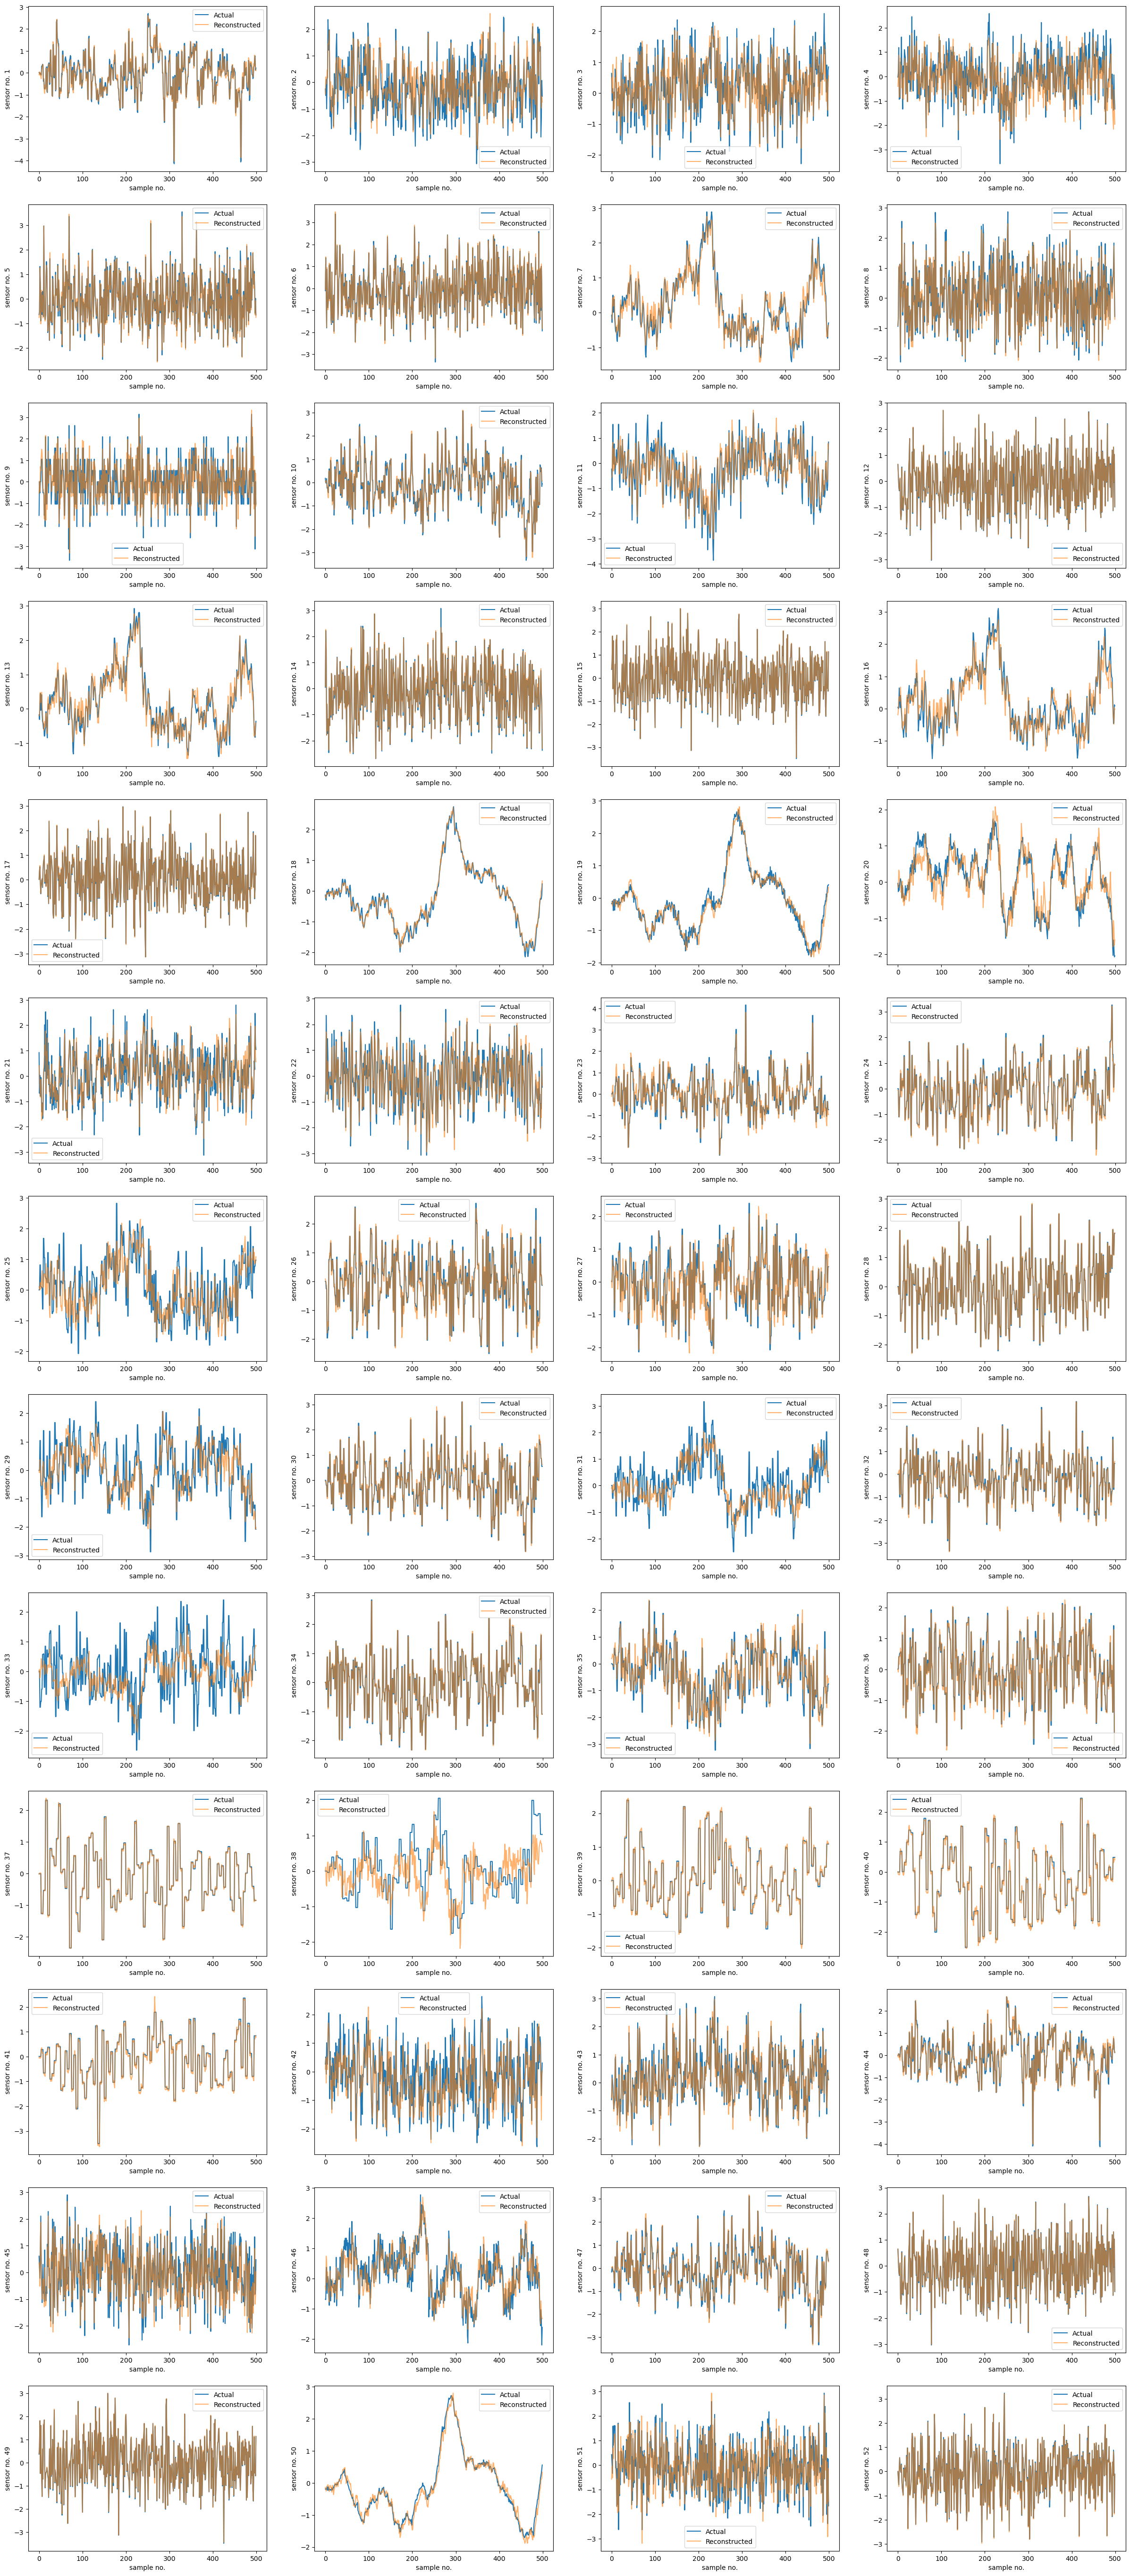

In [107]:
fig, ax = plt.subplots(13,4,figsize=(30,70))

for i in range (0,temp_pred.shape[1]):  #select all the feature columns to plot
    ax.ravel()[i].plot(temp_sc[:,i],label='Actual')
    ax.ravel()[i].plot(temp_pred[:,i],label='Reconstructed',alpha=0.6)
    ax.ravel()[i].set_xlabel('sample no.')
    ax.ravel()[i].set_ylabel(f'sensor no. {i+1}')
    ax.ravel()[i].legend()
   
  

In [93]:
def recon_loss(NN,X):
    #NN is the trained neural network model
    X_pred = NN.predict(X)
    reconstruction_loss = np.mean((X-X_pred)**2,axis=1)
    return reconstruction_loss

157/157 [==============================] - 1s 3ms/step


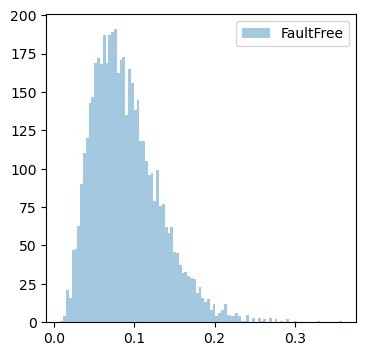

In [108]:
X_faultFree = sc.transform(DF[DF['faultNumber']==0].iloc[:,3:])

FaultFree_reconstruction_loss=recon_loss(NN=autoencoder,X=X_faultFree[np.random.randint(1,len(X_faultFree),5000)])

plt.rcParams['figure.figsize'] = [4, 4]
plt.hist(FaultFree_reconstruction_loss, bins=100,label='FaultFree',alpha=0.4)
plt.legend()
plt.show()

# Faulty data reconstruction loss

157/157 [==============================] - 0s 1ms/step


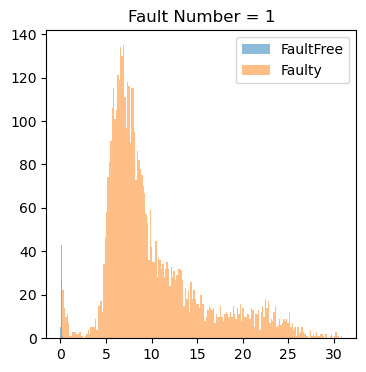

157/157 [==============================] - 0s 1ms/step


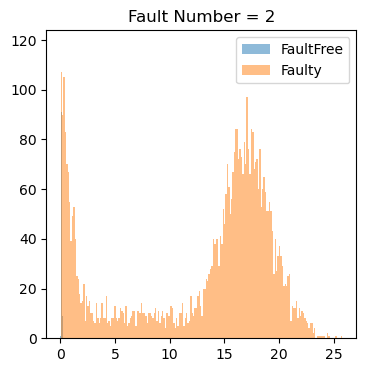

157/157 [==============================] - 0s 1ms/step


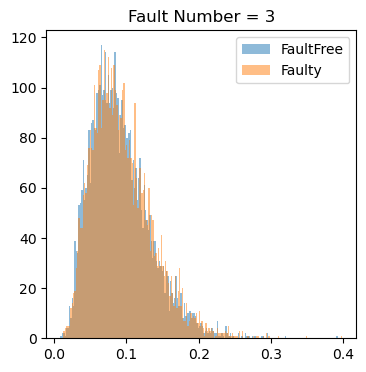

157/157 [==============================] - 0s 1ms/step


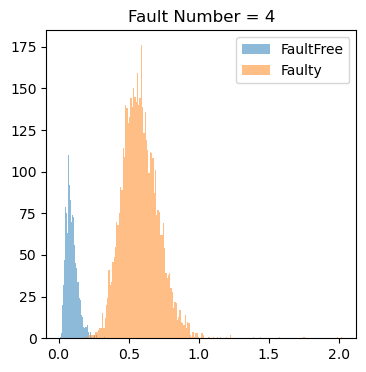

157/157 [==============================] - 0s 1ms/step


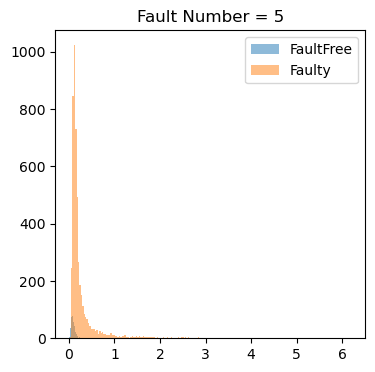

157/157 [==============================] - 0s 2ms/step


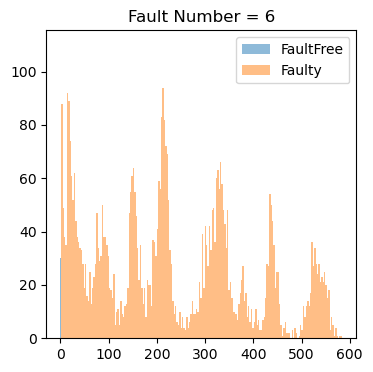

157/157 [==============================] - 0s 1ms/step


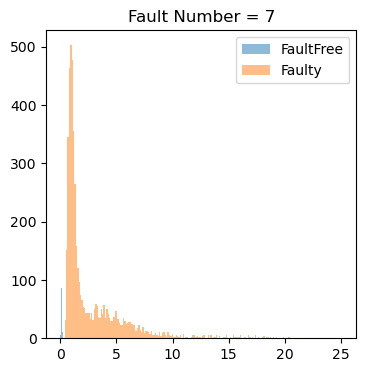

157/157 [==============================] - 0s 1ms/step


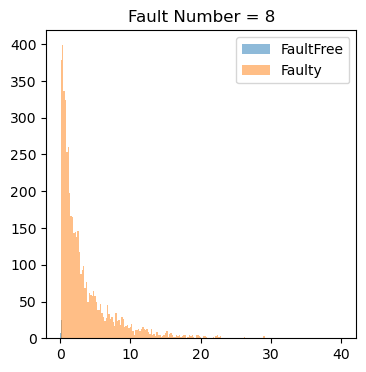

157/157 [==============================] - 0s 2ms/step


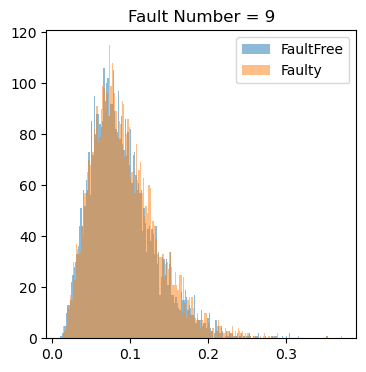

157/157 [==============================] - 0s 1ms/step


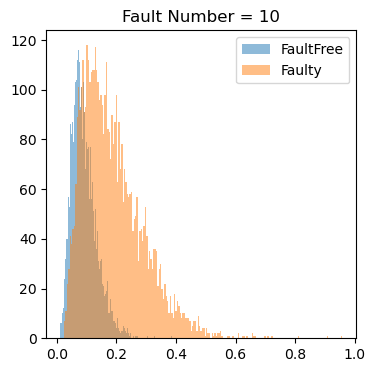

157/157 [==============================] - 0s 1ms/step


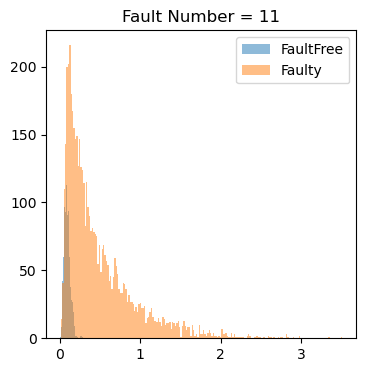

157/157 [==============================] - 0s 1ms/step


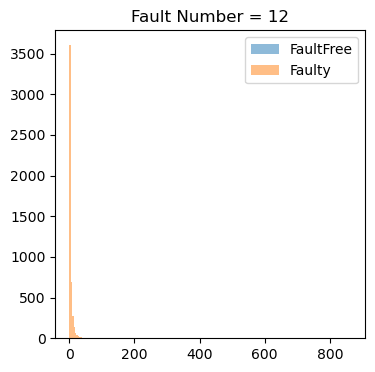

157/157 [==============================] - 0s 1ms/step


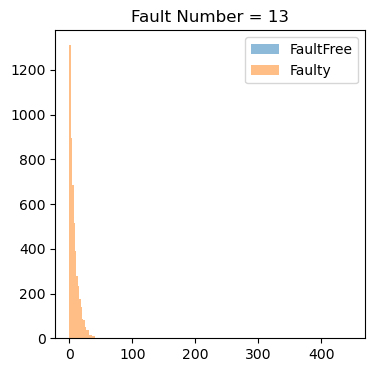

157/157 [==============================] - 0s 1ms/step


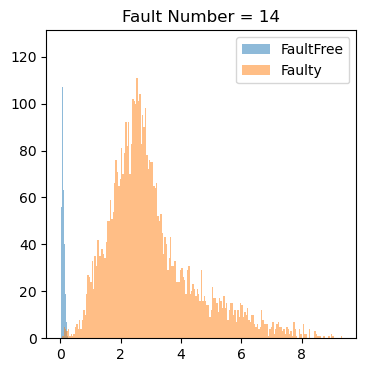

157/157 [==============================] - 0s 1ms/step


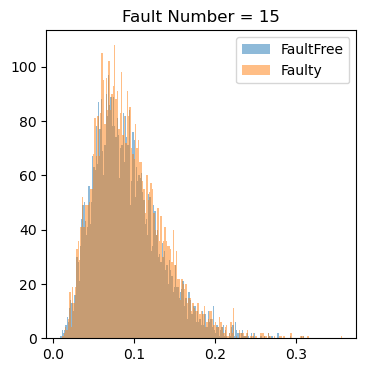

157/157 [==============================] - 0s 1ms/step


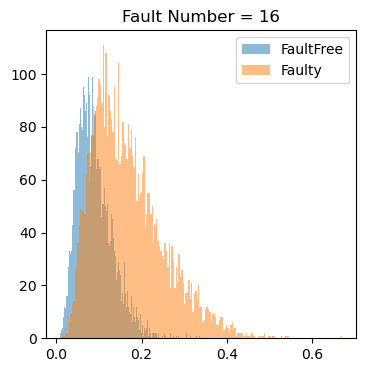

157/157 [==============================] - 0s 1ms/step


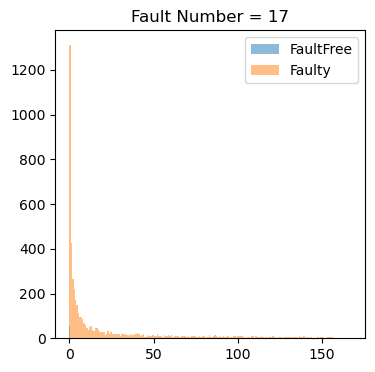

157/157 [==============================] - 0s 1ms/step


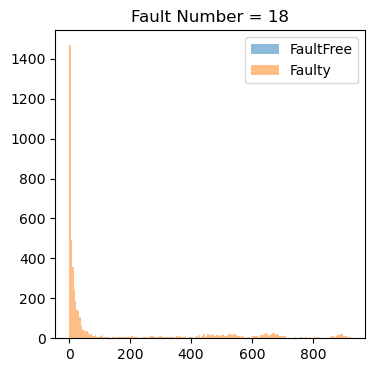

157/157 [==============================] - 0s 1ms/step


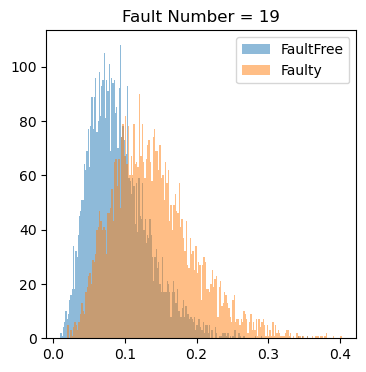

157/157 [==============================] - 0s 1ms/step


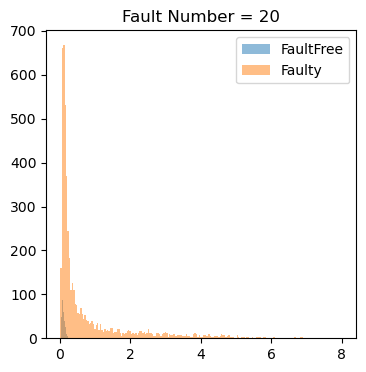

In [95]:
for F_num in range(1,21):
    temp_faulty=DF[(DF.faultNumber==F_num) & (DF['sample'] > 20.0 )] #DF[(DF.faultNumber==F_num) & (DF.simulationRun==1 )]
    # Scale the data to standardize
    X_faulty = sc.transform(temp_faulty.iloc[:,3:])
    # Recon loss based on Autoencoder
    faulty_reconstruction_loss = recon_loss(NN=autoencoder,X=X_faulty[np.random.randint(1,len(X_faulty),5000)])

    plt.rcParams['figure.figsize'] = [4, 4]
    plt.hist(FaultFree_reconstruction_loss, bins=200,label='FaultFree',alpha=0.5)
    plt.hist(faulty_reconstruction_loss, bins=200,label='Faulty',alpha=0.5)
    plt.title(f'Fault Number = {F_num}')
    plt.legend()
    plt.show()

# Realtime Fault detection

In [109]:
# Obtain mean and standard deviation for 
mu = np.mean(FaultFree_reconstruction_loss)
std = np.std(FaultFree_reconstruction_loss)

# Obtain threshold from mu and std
threshold = mu+3*std
threshold

0.21673835424504806

16/16 [==============================] - 0s 1ms/step


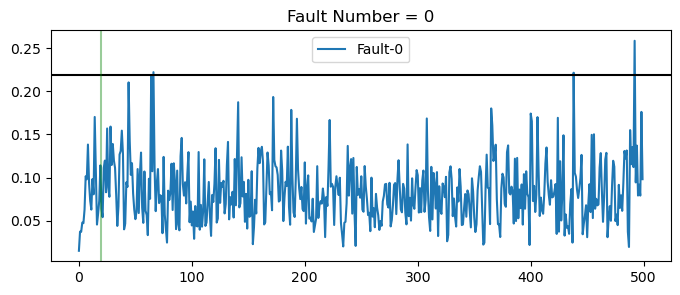

16/16 [==============================] - 0s 1ms/step


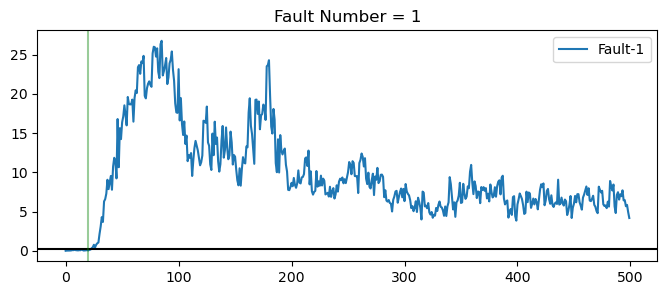

16/16 [==============================] - 0s 1ms/step


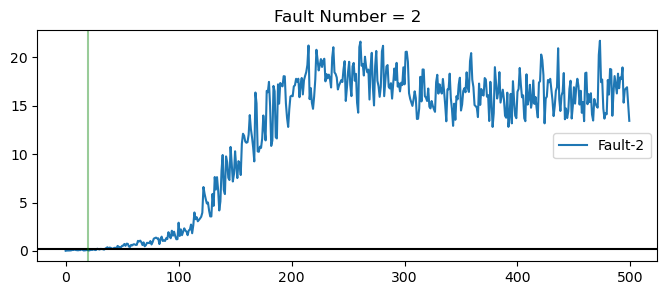

16/16 [==============================] - 0s 2ms/step


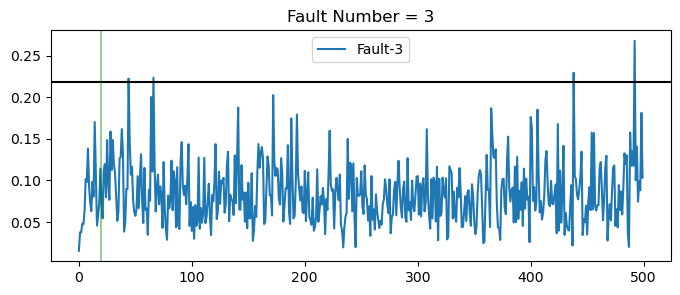

16/16 [==============================] - 0s 2ms/step


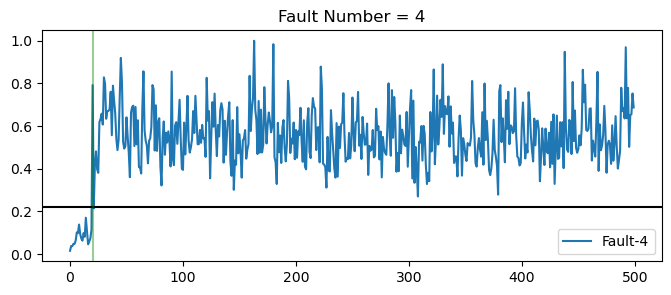

16/16 [==============================] - 0s 1ms/step


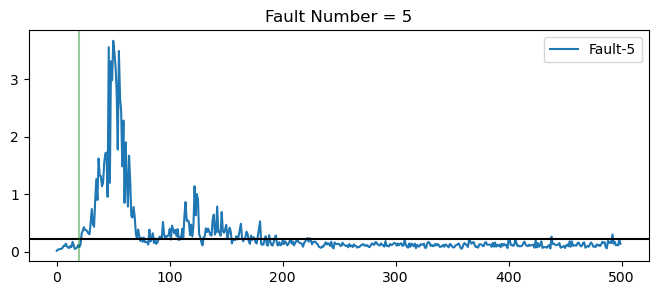

16/16 [==============================] - 0s 2ms/step


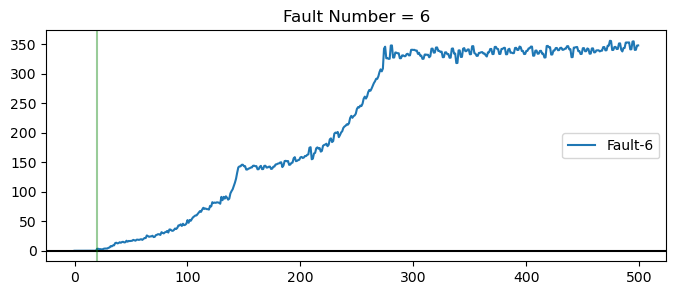

16/16 [==============================] - 0s 1ms/step


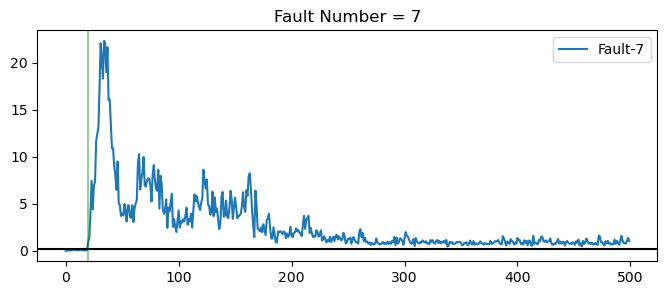

16/16 [==============================] - 0s 1ms/step


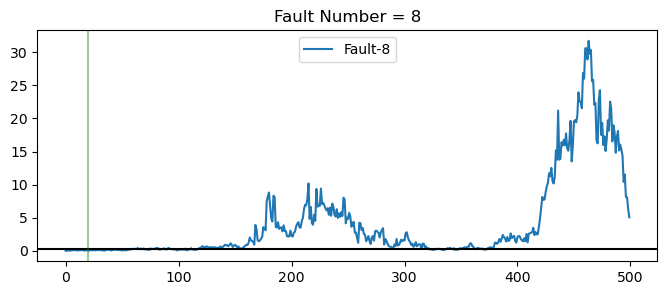

16/16 [==============================] - 0s 1ms/step


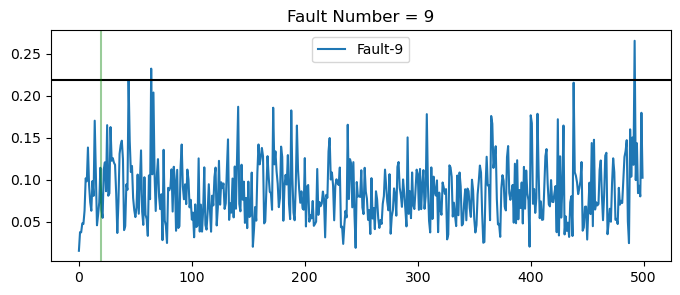

16/16 [==============================] - 0s 1ms/step


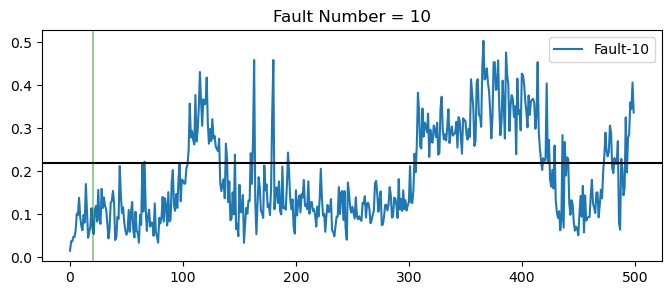

16/16 [==============================] - 0s 1ms/step


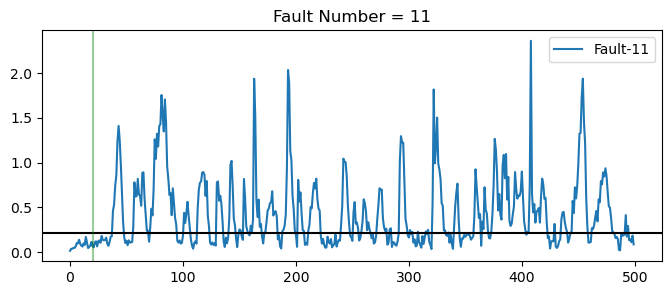

16/16 [==============================] - 0s 1ms/step


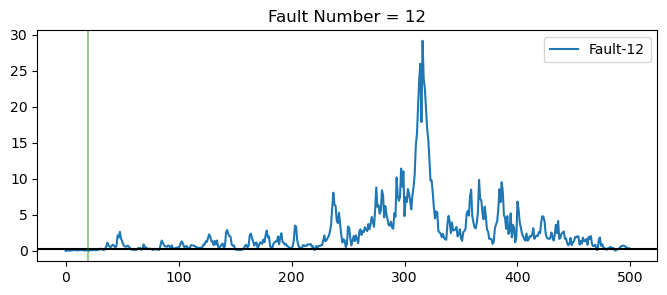

16/16 [==============================] - 0s 1ms/step


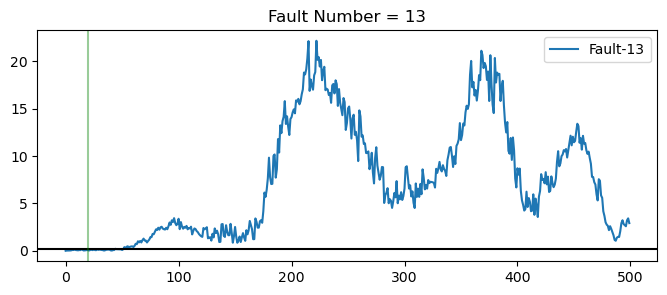

16/16 [==============================] - 0s 2ms/step


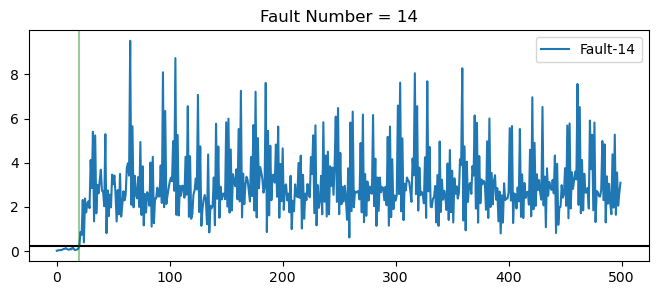

16/16 [==============================] - 0s 2ms/step


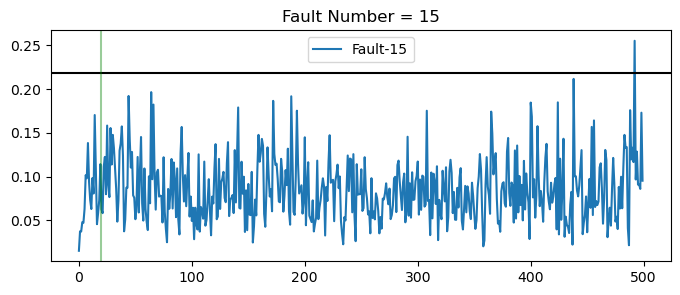

16/16 [==============================] - 0s 1ms/step


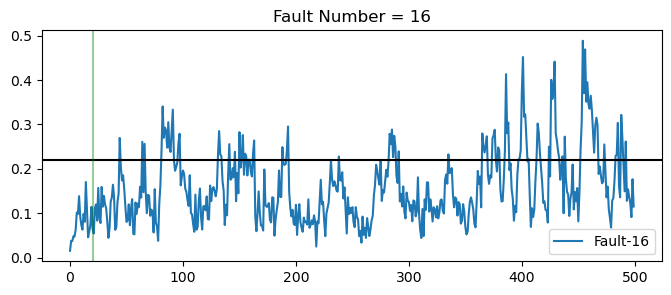

16/16 [==============================] - 0s 1ms/step


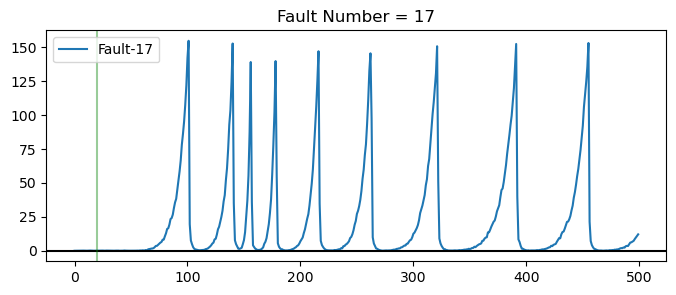

16/16 [==============================] - 0s 2ms/step


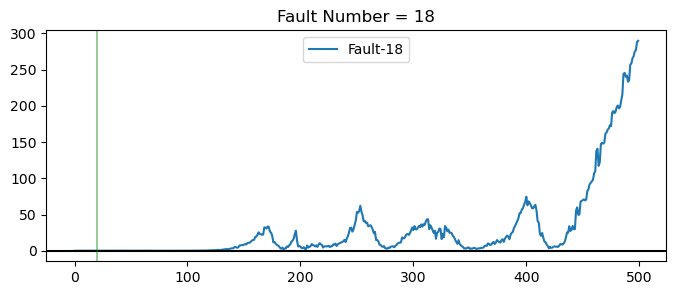

16/16 [==============================] - 0s 2ms/step


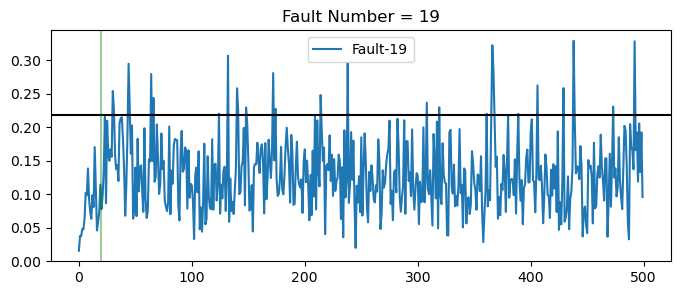

16/16 [==============================] - 0s 1ms/step


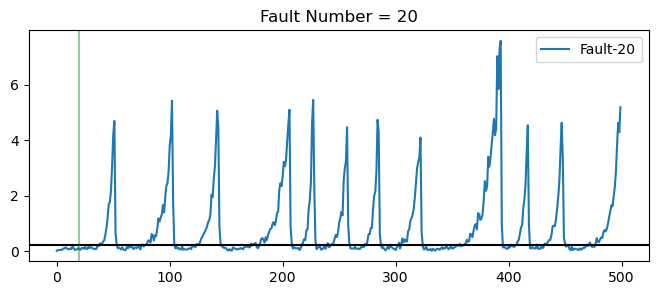

In [97]:

for F_num in range(0,21):
    # store the required fault class and simulation run
    temp = DF[(DF.faultNumber==F_num) & (DF.simulationRun==1 )]  #Faulty Condition
    # Standardization
    X_faulty = sc.transform(temp.iloc[:,3:])
    # Obtain reconstruction loss
    faulty_reconstruction_loss = recon_loss(NN=autoencoder,X=X_faulty) 

    plt.rcParams['figure.figsize'] = [8,3]
    plt.plot(faulty_reconstruction_loss,label=f'Fault-{F_num}')
    plt.axhline(threshold,c='k')    #threshold value
    plt.axvline(20,c='g',alpha=0.4) #time of fault introduction
    plt.title(f'Fault Number = {F_num}')
    plt.legend()
    plt.show()

    

# Evaluate F1 score to compare performance

In [110]:
def combine_result(x,threshold):
    # IF reconstruction loss is grater than threshold THEN its a fault
    result= x > threshold
    result_float = [float(val) for val in result] 
    return result_float

In [99]:
for Fnum in [x for x in range(0,21) if x not in [3,9]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['simulationRun']==1) ]
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    faulty_reconstruction_loss = recon_loss(NN=autoencoder,X=X_faulty) 
    
    #populate the true value (y_true) based of Fnum
    y_pred = combine_result(x=faulty_reconstruction_loss,threshold=threshold)
    
    
    if Fnum==0:
        y_true = np.repeat(0, len(y_pred))
    else:
        y_true = np.repeat(1, len(y_pred))
        y_true[0:21]=0 # Beacuse the fault was introduced after 20th sample
        

    # Obtain F1 score    
    from sklearn.metrics import f1_score,accuracy_score
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    print(f'The F1-Score for Fault_num={Fnum} is {f1}')
    print(f'The Accuracy-Score for Fault_num={Fnum} is {acc}')
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

16/16 [==============================] - 0s 1ms/step
The F1-Score for Fault_num=0 is 0.49849548645937813
The Accuracy-Score for Fault_num=0 is 0.994
[[497   3]
 [  0   0]]
16/16 [==============================] - 0s 1ms/step
The F1-Score for Fault_num=1 is 0.9762267021681248
The Accuracy-Score for Fault_num=1 is 0.996
[[ 21   0]
 [  2 477]]
16/16 [==============================] - 0s 2ms/step
The F1-Score for Fault_num=2 is 0.8675847457627118
The Accuracy-Score for Fault_num=2 is 0.972
[[ 21   0]
 [ 14 465]]
16/16 [==============================] - 0s 2ms/step
The F1-Score for Fault_num=4 is 0.9751466348543593
The Accuracy-Score for Fault_num=4 is 0.996
[[ 20   1]
 [  1 478]]
16/16 [==============================] - 0s 2ms/step
The F1-Score for Fault_num=5 is 0.28407241703100367
The Accuracy-Score for Fault_num=5 is 0.326
[[ 21   0]
 [337 142]]
16/16 [==============================] - 0s 2ms/step
The F1-Score for Fault_num=6 is 0.9872835016149952
The Accuracy-Score for Fault_num=6 is 0

# Get the mean-F1 score of all types of faults from (0-21) for bench marking

In [101]:
F1_all = [] #initialize the emplty list of F1 score
Acc_all = []
for Fnum in [x for x in range(0,21) if x not in [3,9]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['simulationRun']==np.random.randint(1,500))]
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    faulty_reconstruction_loss = recon_loss(NN=autoencoder,X=X_faulty) 

    
    y_pred = combine_result(x=faulty_reconstruction_loss,threshold=threshold)
    
    if Fnum==0:
        y_true = np.repeat(0, len(y_pred))
    else:
        y_true = np.repeat(1, len(y_pred))
        y_true[0:21]=0 # Beacuse the fault was introduced after 20th sample

    # Obtain F1 score    
    from sklearn.metrics import f1_score,accuracy_score
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    F1_all.append(f1)
    Acc_all.append(acc)
    
print(f'The mean F1-Score for Autoencoder-reconstruction method is {np.mean(np.array(F1_all))}')
print(f'The mean Accuracy-Score for Autoencoder-reconstruction method is {np.mean(np.array(Acc_all))}')

16/16 [==============================] - 0s 1ms/step
The mean F1-Score for Autoencoder-reconstruction method is 0.6274539227983317
The mean Accuracy-Score for Autoencoder-reconstruction method is 0.7243157894736844
